# 1. Formatting

## 1.1 Imports

In [440]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import plotly.graph_objects as go

## 1.2 Read Data

In [441]:
# df = pd.read_csv("C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Simulation\\Simulation 1.csv")
df = pd.read_csv("/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Simulation/Example 6 Finale.csv")

columns_of_interest = [
    'Catastrophe Point Index', 
    'Speculator Proportion at CUSP', 'Market Price at CUSP', 'Excess Demand', 
    'Kurtosis MP', 'Kurtosis ED', 'Kurtosis SP', 'MP Volatility Last 100 Trades', 
    'MP Volatility Last 10 Trades', 'Overall Sim Volatility', 
    'Pre-CUSP Market Price Difference', 'Last 100 Pre-CUSP Market Prices Difference'
]

# df['Speculator Proportion at CUSP'] = df['Speculator Proportion at CUSP'].str.rstrip('%').astype('float') / 100
df['Speculator Proportion at CUSP'] = df['Speculator Proportion at CUSP'].str.rstrip('%').astype('float')
df = df[df['Catastrophe Point Found?'] == True]

# 1. Understanding the Data

## 1.1 Table Summary

In [442]:
df_1 = df.copy()

df_1.describe()

,Run Number,Fundamentalists Initialised,Speculators Initialised,Speculators Added/Removed Per Cycle,Num Cycle,Cool off Per Cycle,Speculator Proportion at CUSP,Market Price at CUSP,Excess Demand,Kurtosis MP,Kurtosis ED,Kurtosis SP,MP Volatility Last 100 Trades,MP Volatility Last 10 Trades,Overall Sim Volatility,Pre-CUSP Market Price Difference,Last 100 Pre-CUSP Market Prices Difference,Total Trades,Catastrophe Point Index
count,943.000000,943.0,943.0,943.0,943.0,943.0,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,742.000000,943.000000,943.000000,943.000000,943.0,943.000000
mean,503.356310,900.0,1600.0,1.0,45.0,1.0,64.964284,73.362725,-412.876988,-0.186275,-0.780171,-1.200063,1.174108,0.913907,6.385498,110.527041,14.630594,112500.0,61648.429480
std,290.425459,0.0,0.0,0.0,0.0,0.0,0.134522,14.149754,170.560048,0.507597,0.927707,0.001958,1.974992,1.937261,0.397488,8.632221,6.383834,0.0,8395.803078
min,1.000000,900.0,1600.0,1.0,45.0,1.0,64.600000,52.550000,-1298.000000,-1.434870,-1.783140,-1.207300,0.476000,0.000000,5.141000,81.200000,0.350000,112500.0,39026.000000
25%,250.500000,900.0,1600.0,1.0,45.0,1.0,64.880000,60.450000,-515.000000,-0.542000,-1.270505,-1.201435,0.516000,0.548000,6.124000,104.625000,10.050000,112500.0,56040.500000
50%,504.000000,900.0,1600.0,1.0,45.0,1.0,64.960000,71.250000,-389.000000,-0.250490,-1.020220,-1.199700,0.594000,0.577000,6.369000,110.550000,13.700000,112500.0,61421.000000
75%,757.500000,900.0,1600.0,1.0,45.0,1.0,65.040000,90.200000,-290.000000,0.125185,-0.606530,-1.198495,0.790500,0.577000,6.637000,116.700000,18.325000,112500.0,66947.000000
max,1000.000000,900.0,1600.0,1.0,45.0,1.0,65.600000,95.850000,-63.000000,2.812130,9.750200,-1.195470,25.428000,22.296000,7.844000,133.250000,38.100000,112500.0,102122.000000


## 1.2 Boxplot of Each Columns Data

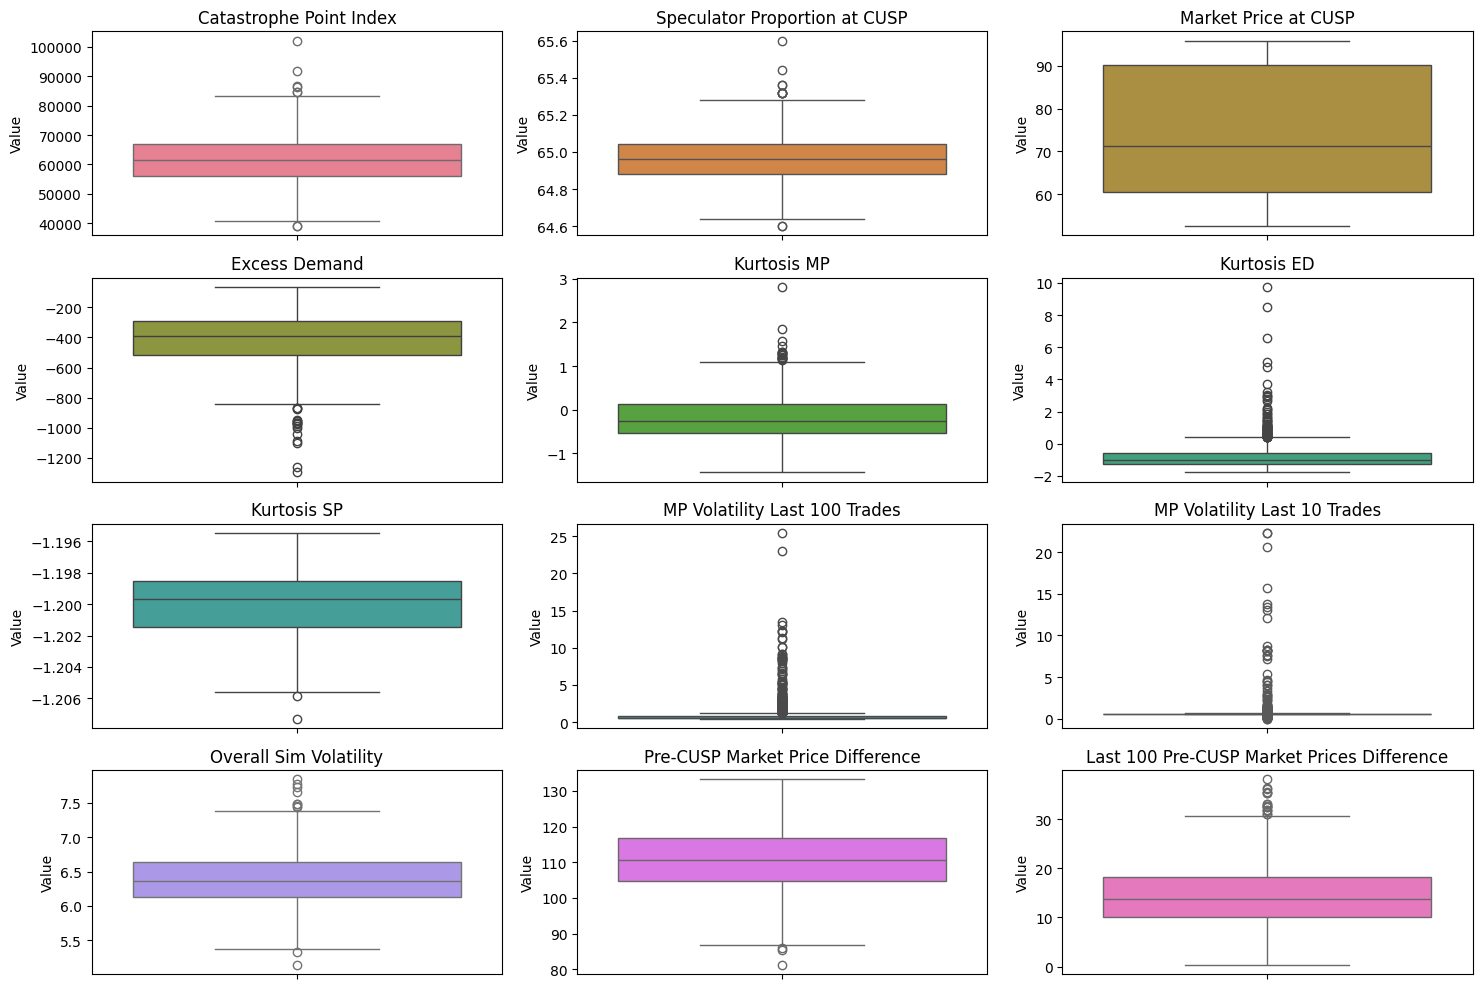

In [443]:
colors = sns.color_palette('husl', len(columns_of_interest)) 

n_cols = 3  
n_rows = (len(columns_of_interest) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10)) 
axes = axes.flatten()  

for i, column in enumerate(columns_of_interest):
    sns.boxplot(data=df, y=column, ax=axes[i], color=colors[i])  
    axes[i].set_title(column) 
    axes[i].set_xlabel('')  
    axes[i].set_ylabel('Value')  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 1. Catastrophe Point Base Stats

## 2.1 Catastrophe Point Found Count

In [444]:
df_3 = df.copy()

catastrophe_count = df_3['Catastrophe Point Found?'].value_counts()
catastrophe_count

Catastrophe Point Found?
True    943
Name: count, dtype: int64

## 2.2 Castrophe Point Found Summary Stats

In [445]:
df_2 = df.copy()
df_2 = df[df['Catastrophe Point Found?'] == True]

summary_stats = df_2[columns_of_interest].agg(['mean', 'min', 'max'])
summary_stats

,Catastrophe Point Index,Speculator Proportion at CUSP,Market Price at CUSP,Excess Demand,Kurtosis MP,Kurtosis ED,Kurtosis SP,MP Volatility Last 100 Trades,MP Volatility Last 10 Trades,Overall Sim Volatility,Pre-CUSP Market Price Difference,Last 100 Pre-CUSP Market Prices Difference
mean,61648.42948,64.964284,73.362725,-412.876988,-0.186275,-0.780171,-1.200063,1.174108,0.913907,6.385498,110.527041,14.630594
min,39026.00000,64.600000,52.550000,-1298.000000,-1.434870,-1.783140,-1.207300,0.476000,0.000000,5.141000,81.200000,0.350000
max,102122.00000,65.600000,95.850000,-63.000000,2.812130,9.750200,-1.195470,25.428000,22.296000,7.844000,133.250000,38.100000


## 2.3 Correlation Matrix

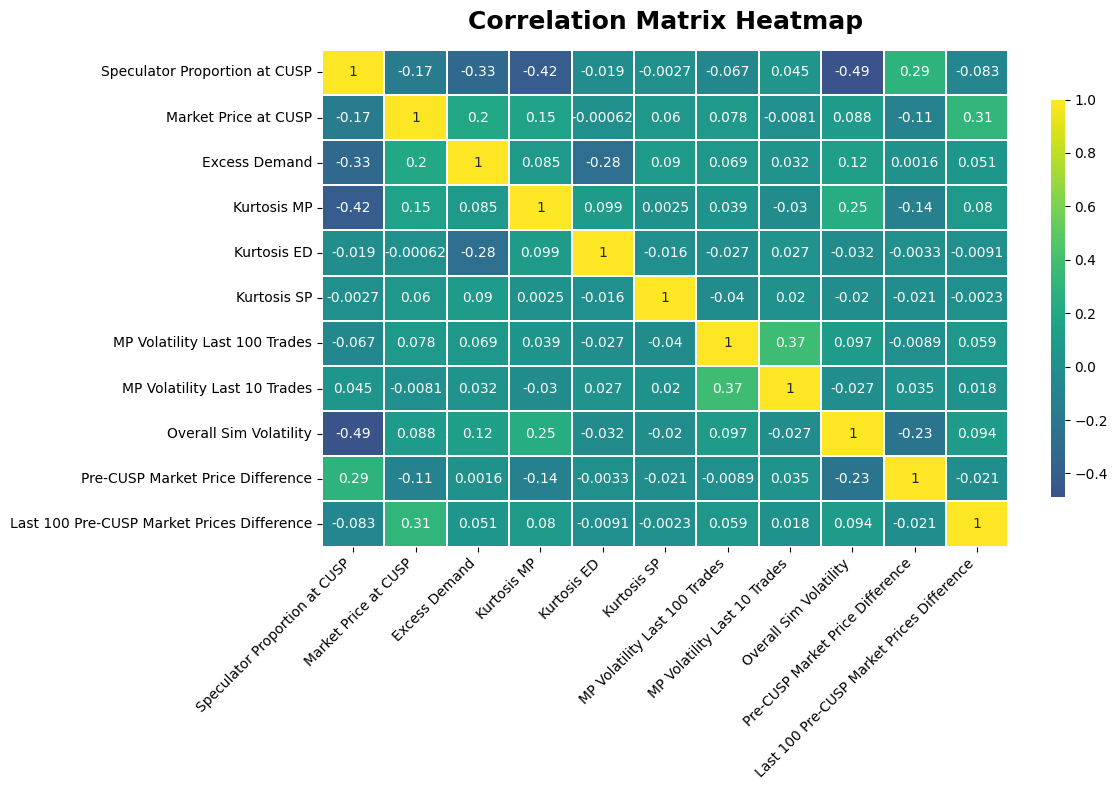

In [446]:
df_4 = df.copy()
df_4 = df[df['Catastrophe Point Found?'] == True]

corr_matrix_cols = [
    'Speculator Proportion at CUSP', 
    'Market Price at CUSP', 'Excess Demand', 'Kurtosis MP', 'Kurtosis ED', 
    'Kurtosis SP', 'MP Volatility Last 100 Trades', 'MP Volatility Last 10 Trades', 
    'Overall Sim Volatility', 'Pre-CUSP Market Price Difference', 
    'Last 100 Pre-CUSP Market Prices Difference'
]
df_4 = df_4[corr_matrix_cols]
corr_matrix = df_4.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='viridis',  # Aesthetic, perceptually uniform colormap
    center=0, 
    linewidths=0.3, 
    cbar_kws={"shrink": 0.8, "aspect": 30},  # Adjust colour bar size
    annot_kws={"size": 10},  # Control annotation font size
)
plt.title('Correlation Matrix Heatmap', fontsize=18, weight='bold', pad=15)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()

## 2.3 CUSP Point Speculator Proportion Distribution

90.0% of the data exists within the speculator proportion range 6480.0% - 6516.0%


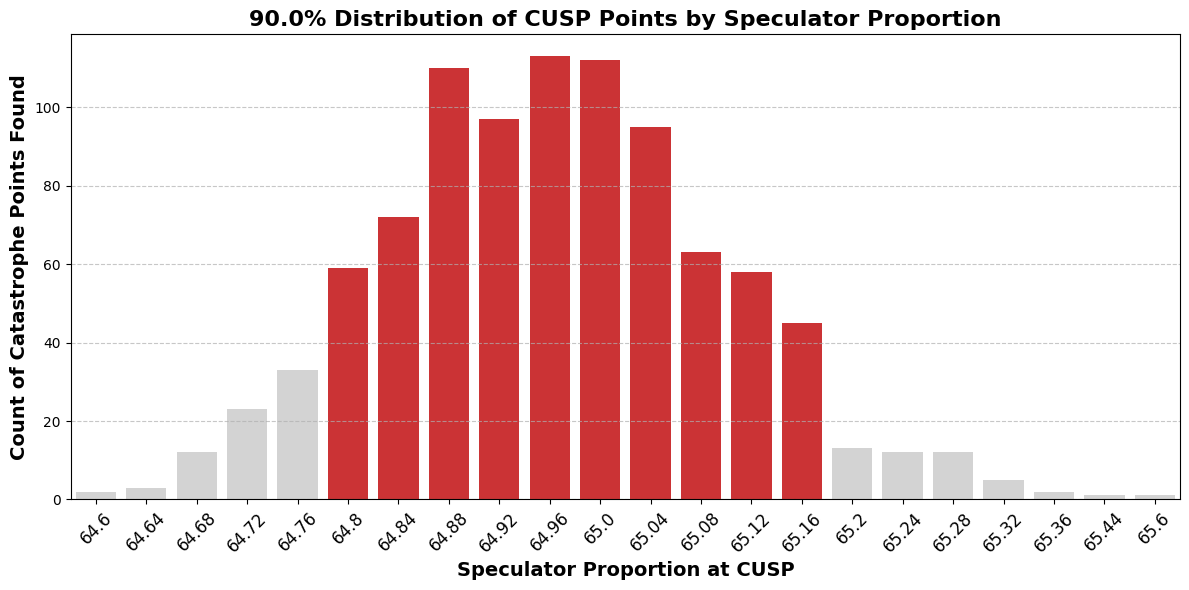

In [447]:
df_5 = df.copy()
df_5 = df_5[df_5['Catastrophe Point Found?'] == True]
df_5['Speculator Proportion at CUSP'] = df_5['Speculator Proportion at CUSP'].round(4)

df_5_counts = df_5['Speculator Proportion at CUSP'].value_counts().reset_index()
df_5_counts.columns = ['Speculator Proportion at CUSP', 'Count']
df_5_counts['Cumulative Count'] = df_5_counts['Count'].cumsum()
total_count = df_5_counts['Count'].sum()
df_5_counts['Cumulative Proportion'] = df_5_counts['Cumulative Count'] / total_count
threshold = 0.90

majority_data = df_5_counts[df_5_counts['Cumulative Proportion'] <= threshold]

if not majority_data.empty:
    lower_bound = majority_data['Speculator Proportion at CUSP'].min()
    upper_bound = majority_data['Speculator Proportion at CUSP'].max()
    print(f"{threshold*100}% of the data exists within the speculator proportion range {lower_bound*100}% - {upper_bound*100}%")
else:
    lower_bound, upper_bound = None, None

df_5_counts = df_5_counts.sort_values(by='Speculator Proportion at CUSP')

base_color = 'lightgrey'
highlight_color = '#E41A1C'
bar_colors = []

for x in df_5_counts['Speculator Proportion at CUSP']:
    if lower_bound is not None and upper_bound is not None:
        if lower_bound <= x <= upper_bound:
            bar_colors.append(highlight_color) 
        else:
            bar_colors.append(base_color)
    else:
        bar_colors.append(base_color)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_5_counts, x='Speculator Proportion at CUSP', y='Count', palette=bar_colors)

plt.title(f'{threshold*100}% Distribution of CUSP Points by Speculator Proportion', fontsize=16, weight='bold', color='black')
plt.xlabel('Speculator Proportion at CUSP', fontsize=14, weight='bold', color='black')
plt.ylabel('Count of Catastrophe Points Found', fontsize=14, weight='bold', color='black')

plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('white')
plt.tight_layout()
plt.show()

## 2.4 Average Kurtosis at Each Speculator Proportion (90% of the data)

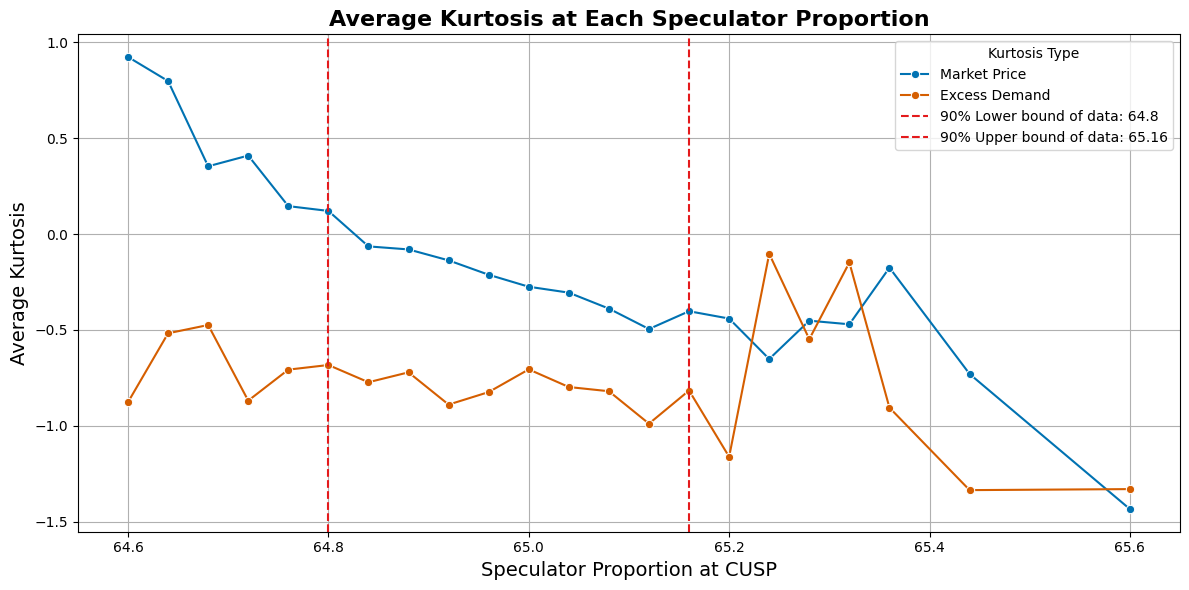

In [448]:
df_6 = df.copy()

df_kurtosis_avg = df_6.groupby('Speculator Proportion at CUSP').agg({
    'Kurtosis MP': 'mean',
    'Kurtosis ED': 'mean',
}).reset_index()
df_kurtosis_avg.rename(columns={
    'Kurtosis MP': 'Market Price',
    'Kurtosis ED': 'Excess Demand'
}, inplace=True)

df_kurtosis_melted = df_kurtosis_avg.melt(id_vars='Speculator Proportion at CUSP', 
                                            value_vars=['Market Price', 
                                                        'Excess Demand'], 
                                            var_name='Kurtosis Type', 
                                            value_name='Average Kurtosis')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_kurtosis_melted, x='Speculator Proportion at CUSP', y='Average Kurtosis', hue='Kurtosis Type', marker='o', palette=['#0072B2', '#D55E00'])

lower_vert_ax = lower_bound
upper_vert_ax = upper_bound
plt.axvline(x=lower_vert_ax, color='#E41A1C', linestyle='--', label=f'90% Lower bound of data: {lower_bound}')
plt.axvline(x=upper_vert_ax, color='#E41A1C', linestyle='--', label=f'90% Upper bound of data: {upper_bound}')

plt.title('Average Kurtosis at Each Speculator Proportion', fontsize=16, weight='bold')
plt.xlabel('Speculator Proportion at CUSP', fontsize=14)
plt.ylabel('Average Kurtosis', fontsize=14)
plt.grid()
plt.legend(title='Kurtosis Type')

plt.tight_layout() 
plt.show()


## 2.5 Average Market Price Volatility Last 100 / 10 Trades

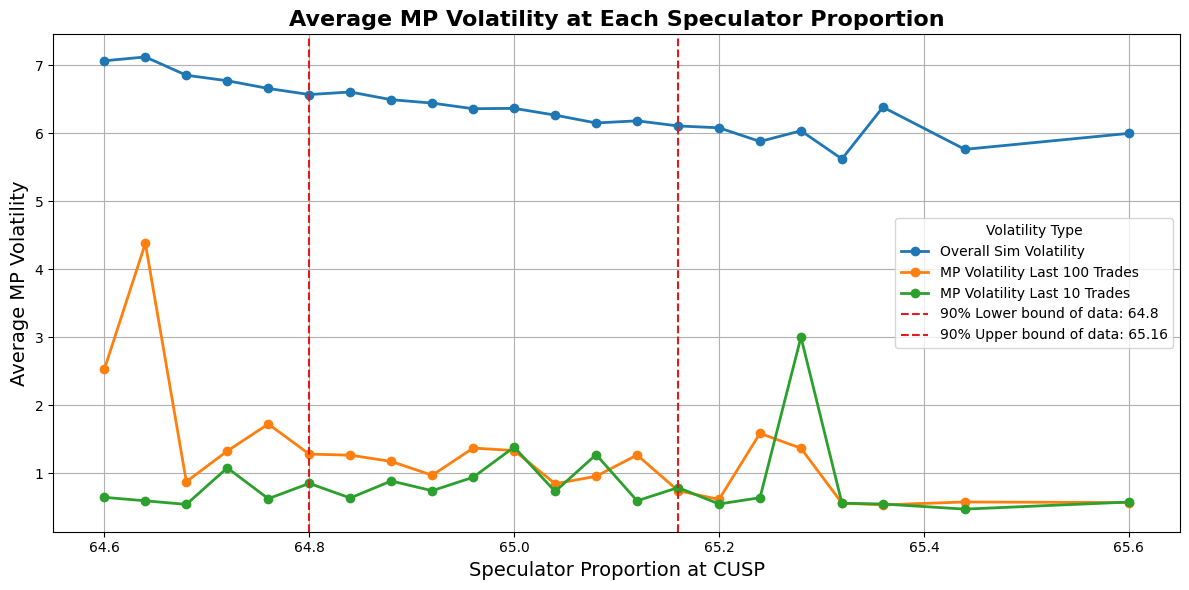

In [455]:
df_7 = df.copy()
df_volatility_avg = df_7.groupby('Speculator Proportion at CUSP').agg({
    'Overall Sim Volatility': 'mean',
    'MP Volatility Last 100 Trades': 'mean',
    'MP Volatility Last 10 Trades': 'mean'
}).reset_index()
df_volatility_melted = df_volatility_avg.melt(id_vars='Speculator Proportion at CUSP', 
                                                value_vars=['Overall Sim Volatility',
                                                            'MP Volatility Last 100 Trades', 
                                                            'MP Volatility Last 10 Trades'], 
                                                var_name='Volatility Type', 
                                                value_name='Average Volatility')

plt.figure(figsize=(12, 6))
for volatility_type in df_volatility_melted['Volatility Type'].unique():
    filtered_data = df_volatility_melted[df_volatility_melted['Volatility Type'] == volatility_type]
    plt.plot(filtered_data['Speculator Proportion at CUSP'], 
             filtered_data['Average Volatility'], 
             marker='o', 
             label=volatility_type, 
             linewidth=2)

if lower_bound is not None and upper_bound is not None:
    plt.axvline(x=lower_bound, color='#E41A1C', linestyle='--', 
                label=f'90% Lower bound of data: {lower_bound}')
    plt.axvline(x=upper_bound, color='#E41A1C', linestyle='--', 
                label=f'90% Upper bound of data: {upper_bound}')

plt.title('Average MP Volatility at Each Speculator Proportion', fontsize=16, weight='bold')
plt.xlabel('Speculator Proportion at CUSP', fontsize=14)
plt.ylabel('Average MP Volatility', fontsize=14)
plt.grid()
plt.legend(title='Volatility Type')
plt.tight_layout()
plt.show()

## Average MP Price Difference at Each Speculator Proportion

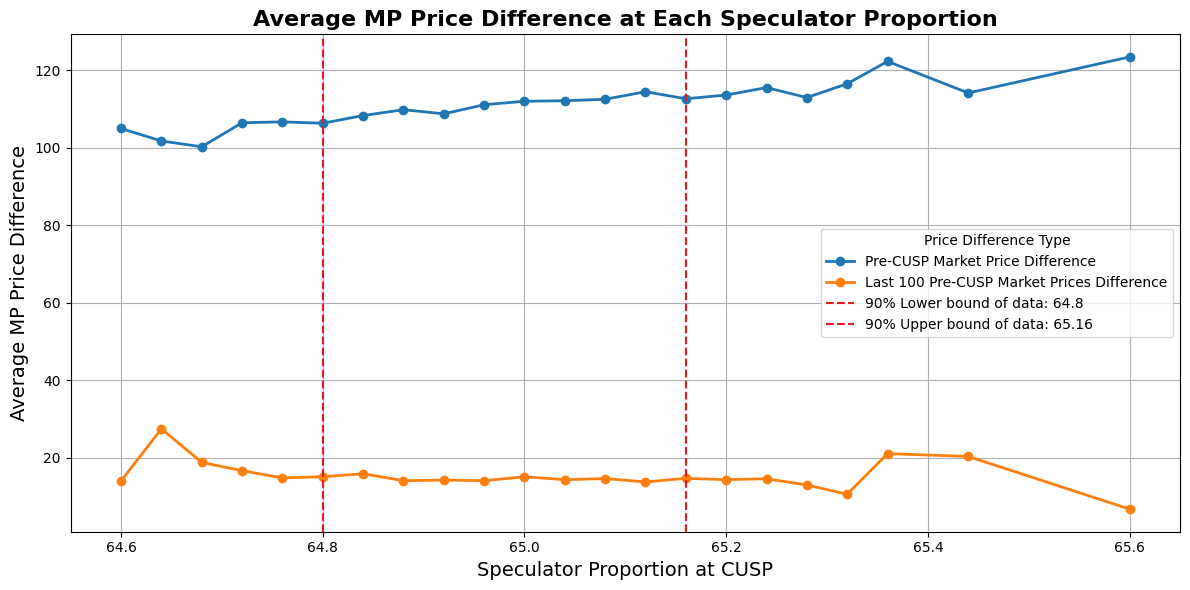

In [457]:
df_8 = df.copy()

df_price_difference_avg = df_8.groupby('Speculator Proportion at CUSP').agg({
    'Pre-CUSP Market Price Difference': 'mean',  
    'Last 100 Pre-CUSP Market Prices Difference': 'mean'    
}).reset_index()

df_price_difference_melted = df_price_difference_avg.melt(id_vars='Speculator Proportion at CUSP', 
                                                            value_vars=['Pre-CUSP Market Price Difference', 
                                                                        'Last 100 Pre-CUSP Market Prices Difference'], 
                                                            var_name='Price Difference Type', 
                                                            value_name='Average Price Difference')

plt.figure(figsize=(12, 6))
for price_difference_type in df_price_difference_melted['Price Difference Type'].unique():
    filtered_data = df_price_difference_melted[df_price_difference_melted['Price Difference Type'] == price_difference_type]
    plt.plot(filtered_data['Speculator Proportion at CUSP'], 
             filtered_data['Average Price Difference'], 
             marker='o', 
             label=price_difference_type, 
             linewidth=2)

if 'lower_bound' in locals() and 'upper_bound' in locals():  
    plt.axvline(x=lower_bound, color='#E41A1C', linestyle='--', 
                label=f'90% Lower bound of data: {lower_bound}')
    plt.axvline(x=upper_bound, color='#E41A1C', linestyle='--', 
                label=f'90% Upper bound of data: {upper_bound}')

plt.title('Average MP Price Difference at Each Speculator Proportion', fontsize=16, weight='bold')
plt.xlabel('Speculator Proportion at CUSP', fontsize=14)
plt.ylabel('Average MP Price Difference', fontsize=14)
plt.grid()
plt.legend(title='Price Difference Type')
plt.tight_layout()
plt.show()


## 2.6 Average Market Price at Each Speculator Proportion

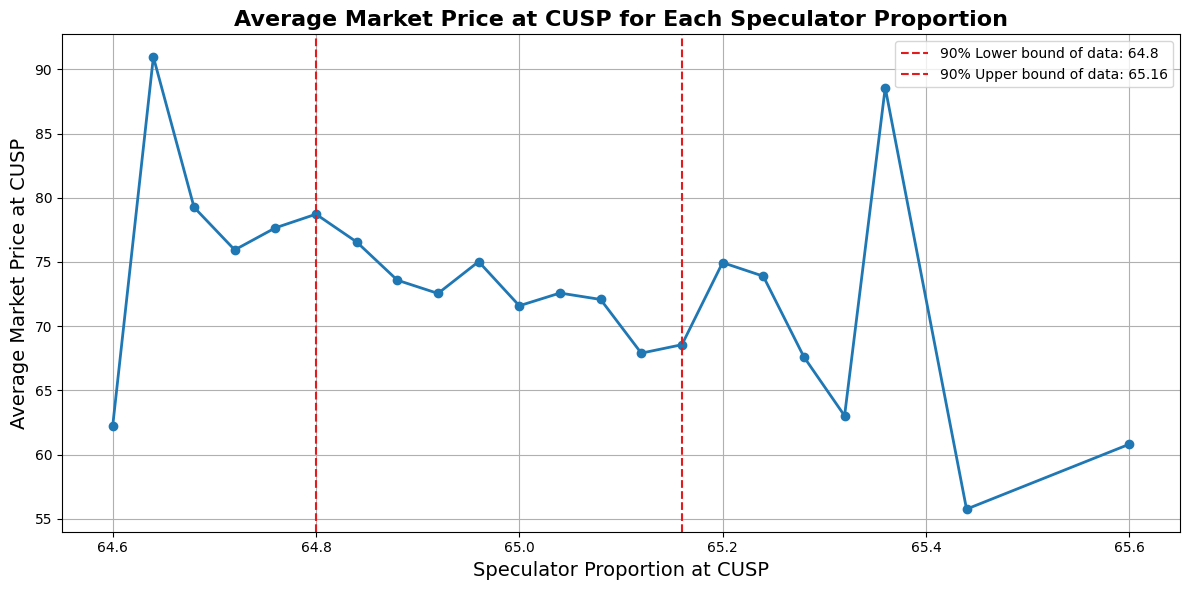

In [451]:
df_9 = df.copy()

df_market_price_avg = df_9.groupby('Speculator Proportion at CUSP').agg({
    'Market Price at CUSP': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_market_price_avg['Speculator Proportion at CUSP'], 
         df_market_price_avg['Market Price at CUSP'], 
         marker='o', 
         linewidth=2)

if 'lower_bound' in locals() and 'upper_bound' in locals():
    plt.axvline(x=lower_bound, color='#E41A1C', linestyle='--', 
                label=f'90% Lower bound of data: {lower_bound}')
    plt.axvline(x=upper_bound, color='#E41A1C', linestyle='--', 
                label=f'90% Upper bound of data: {upper_bound}')

plt.title('Average Market Price at CUSP for Each Speculator Proportion', fontsize=16, weight='bold')
plt.xlabel('Speculator Proportion at CUSP', fontsize=14)
plt.ylabel('Average Market Price at CUSP', fontsize=14)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()